Veamos cómo clasificar muchas clases usando la herramienta **(OvA, OvO)**

1) OvA - one-versus-all strategy
2) OvO - one-vs-one

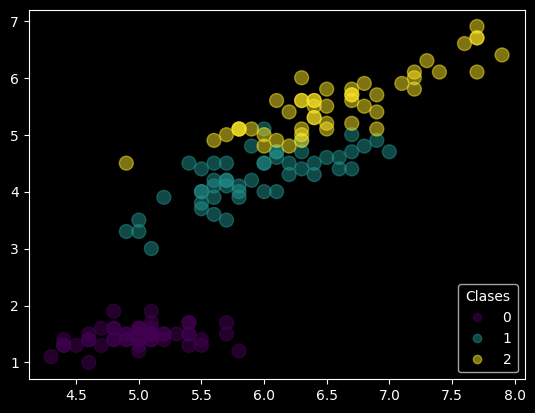

In [77]:
from sklearn.datasets import load_iris # conjunto de datos Iris
import matplotlib.pyplot as plt


iris_dataset = load_iris()
x = iris_dataset.data.T[0] # Es una operación de transposición. En este contexto, transpone la matriz de datos cambiando filas y columnas en lugares. Entonces, ahora cada fila representa un rasgo y cada columna es un patrón (punto de datos).
y = iris_dataset.data.T[2]

scatter = plt.scatter(x, y, alpha=0.5, s=100, c=iris_dataset.target)

# Extracción de elementos de leyenda (handles) y etiquetas (labels)
handles, labels = scatter.legend_elements()

# Agregar leyenda a los ejes actuales (gca)
plt.legend(handles, labels, title="Clases", loc="lower right")


plt.show()

Este gráfico muestra perfectamente lo fácil que es separar una clase de las otras dos, y luego concentrarse en separar las clases restantes, reduciendo el problema a dos soluciones binarias:

1) ¿Es Iris Setosa? (sí o no)
2) Si no, echa un vistazo, ¿es Iris Virginica? (sí o no)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# considere un clasificador binario : tome solo las dos primeras clases
features_binary = iris_dataset.data[:100]
target_binary = iris_dataset.target[:100]

x_train, x_test, y_train, y_test = train_test_split(features_binary, 
                                                    target_binary,
                                                    random_state=0)

lr_bin = LogisticRegression(solver="lbfgs", random_state=0)
lr_bin_model = lr_bin.fit(x_train, y_train)
lr_bin_prediction = lr_bin_model.predict(x_test)

accuracy = accuracy_score(y_test, lr_bin_prediction)
print(f'Accuracy: {accuracy}') #aplicamos accuracy ya que el DataSet es equilibrado

Accuracy: 1.0


Digamos que queremos predecir la clase de **una nueva observación [[.5, .5, .32, .44]]**. Veamos cómo nuestro modelo entrenado lo maneja.

In [70]:
new_data = [[.5, .5, .32, .44]]
lr_bin_model.predict(new_data)

array([0])

Aquí, nuestra nueva observación se predijo como un objeto de **clase 0**. Ahora veamos con qué probabilidad el objeto fue asignado a cada una de las dos clases.

In [71]:
lr_bin_model.predict_proba(new_data)

array([[0.99447726, 0.00552274]])

Como podemos ver, 1% de lo que el objeto pertenece a la clase 0, y 98% de lo que pertenece a la clase 1.

Ahora generalizamos la regresión logística a un DataSet *multiclase*. ***Usaremos las 3 clases del conjunto de datos Iris.***

In [72]:
# considere un clasificador multiclase
features_all = iris_dataset.data
target_all = iris_dataset.target


x_train, x_test, y_train, y_test = train_test_split(features_all, 
                                                    target_all,
                                                    random_state=0)

lr_mult = LogisticRegression(random_state=0)
lr_mult_model = lr_bin.fit(x_train, y_train)
lr_mult_prediction = lr_bin_model.predict(x_test)

accuracy = accuracy_score(y_test, lr_mult_prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ahora veamos cómo se comporta el clasificador con **la observación [[.5, .5, .32, .44]]** en el caso de las tres clases.

In [73]:
lr_mult_model.predict(new_data)

array([0])

In [74]:
lr_bin_model.predict_proba(new_data)

array([[9.98888970e-01, 1.11101527e-03, 1.42359469e-08]])

La clase 0 también prevalece aquí, pero a juzgar por las probabilidades de clasificación de otras clases.

**Matriz de errores.**

In [75]:
from sklearn.metrics import confusion_matrix


conf_mtrx = confusion_matrix(y_test, lr_mult_prediction)
conf_mtrx

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Los objetos clasificados correctamente se encuentran en diagonal, las dimensiones son un conjunto de clases (es decir, las clases predichas [0, 1, 2] se encuentran en el eje x y las mismas clases reales se encuentran en el eje y).

A partir de esta matriz, podemos ver que la mayoría de las veces el clasificador confunde objetos de la segunda clase con objetos de la primera.